---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Distributions in Pandas

In [19]:
import pandas as pd
import numpy as np

__Distribution:__ Set of all possible random variables.

When a coin is flipped it has a probability of landing heads up and a probability of landing tails up. If we flip a coin many times we collect a number of measurements of the heads and tails that landed face up and intuitively we know that the number of times we get a heads up will be equal about the number of times we get a tails up for a fair coin. If you flipped a coin a hundred times and you received heads each time you'd probably doubt the fairness of that coin. We can consider the result of each flip of this coin as a __random variable__. 


(When we can consider the set of all possible random variables together we call this a __distribution__.) In this case the distribution is called __binomial__ since there's two possible outputs a heads or a tails. It's also an example of a discreet distribution since there are only categories being used a heads and a tails and not real numbers. 

NumPy actually has some distributions built into it allowing us to make random flips of a coin with given parameters. 

Here we ask for a number from the NumPy binomial distribution. We have two parameters to pass in. The first is the number of times we want it to run. The second is the chance we get a zero, which we will use to represent heads here.

In [20]:
np.random.binomial(1, 0.5)

0

What if we run the simulation a thousand times and divided the result by a thousand. Well you see a number pretty close to 0.5 which means half of the time we had a heads and half of the time we had a tails. 

In [21]:
np.random.binomial(1000, 0.5)/1000

0.515

***
__Q) Suppose we want to simulate the probability of flipping a fair coin 20 times, and getting a number greater than or equal to 15. Use np.random.binomial(n, p, size) to do 10000 simulations of flipping a fair coin 20 times, then see what proportion of the simulations are 15 or greater.__

In [22]:
x = np.random.binomial(20, .5, 10000)
print((x>=15).mean())

0.0203


***

Of course an even weighted binomial distribution is only one simple example. We can also have unevenly weighted binomial distributions. For instance what's the chance although we're tornado today while I’m filming. It's pretty low even though we do get tornadoes here. So maybe there a hundredth of a percentage chance. We can put this into a binomial distribution as a weighting in NumPy. If we run this 100,000 times we see there are pretty minimal tornado events.

In [23]:
chance_of_tornado = 0.01/100
np.random.binomial(100000, chance_of_tornado)

4

the computational tools are starting to allow us to simulate the world which helps us answer questions. I could have shown you the math behind this so we could have worked out the probabilities. But a simulation is essentially another form of inquiry. Let's take one more example. Let's say the chance of a tornado here in Ann Arbor on any given day, is 1% regardless of the time of year. That's higher than realistic but it makes for a quicker demo. And lets say if there's a tornado I'm going to get away from the windows and hide, then come back and do my recording the next day. __So what's the chance of this happening two days in a row?__

can use the binomial distribution in NumPy to simulate this.

Here we create an empty list and we create a number of potential tornado events by asking the NumPy binomial function using our chance of tornado. We'll do this a million times which is just shy of 3,000 years worth of events.

This process is called __sampling the distribution__.

In [24]:
chance_of_tornado = 0.01

tornado_events = np.random.binomial(1, chance_of_tornado, 1000000)
    
two_days_in_a_row = 0
for j in range(1,len(tornado_events)-1):
    if tornado_events[j]==1 and tornado_events[j-1]==1:
        two_days_in_a_row+=1

print('{} tornadoes back to back in {} years'.format(two_days_in_a_row, 1000000/365))

95 tornadoes back to back in 2739.72602739726 years


point here though is that modern computational power allows us to very quickly simulate the effects of different parameters in a distribution. Leading to a new way of understanding the problem. You don't have to work out all the math you can quite often simulate the problem instead and observe the results.

## More distributions

In [25]:
np.random.uniform(0, 1)

0.04940074406142636

In [26]:
np.random.normal(0.75)

1.2386201094119984

Formula for standard deviation
$$\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}$$

In [27]:
distribution = np.random.normal(0.75,size=1000)

np.sqrt(np.sum((np.mean(distribution)-distribution)**2)/len(distribution))

0.9791495987350588

In [28]:
np.std(distribution)

0.9791495987350588

In [29]:
import scipy.stats as stats
stats.kurtosis(distribution)

-0.03233005198519079

In [30]:
stats.skew(distribution)

0.05066848726431662

Let's switch distributions and take a look at a distribution called the Chi Squared distribution, which is also quite commonly used in statistic. The __Chi Squared Distribution__ has only one parameter called the __degrees of freedom__. The degrees of freedom is closely related to the number of samples that you take from a normal population. It's important for significance testing. But what I would like you to observe, is that as the degrees of freedom increases, the shape of the Chi Squared distribution changes. In particular, the skew to the left begins to move towards the center. We can observe this through simulation.

In [31]:
chi_squared_df2 = np.random.chisquare(2, size=10000)
stats.skew(chi_squared_df2)

1.9252854704121998

In [32]:
chi_squared_df5 = np.random.chisquare(5, size=10000)
stats.skew(chi_squared_df5)

1.2967676775891372



A histogram with our plot with the two degrees of freedom is skewed much further to the left, while our plot with the five degrees of freedom is not as highly skewed.

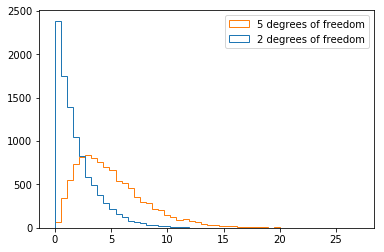

In [33]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2,chi_squared_df5], bins=50, histtype='step', 
                  label=['2 degrees of freedom','5 degrees of freedom'])
plt.legend(loc='upper right')


Remember that a distribution is just a shape that describes the probability of a value being pulled when we sample a population. And NumPy and SciPy each have a number of different distributions built in for us to be able to sample from.

## Reference : [Alen Downey's Think stats 2ed book](http://greenteapress.com/thinkstats2/thinkstats2.pdf)


# Hypothesis Testing

- A hypothesis is a statement that we can test.

In [34]:
df = pd.read_csv('grades.csv')

In [35]:
df.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000


In [36]:
len(df)

2315

In [37]:
early = df[df['assignment1_submission'] <= '2015-12-31']
late = df[df['assignment1_submission'] > '2015-12-31']

In [38]:
early.mean()

assignment1_grade    74.972741
assignment2_grade    67.252190
assignment3_grade    61.129050
assignment4_grade    54.157620
assignment5_grade    48.634643
assignment6_grade    43.838980
dtype: float64

In [39]:
late.mean()

assignment1_grade    74.017429
assignment2_grade    66.370822
assignment3_grade    60.023244
assignment4_grade    54.058138
assignment5_grade    48.599402
assignment6_grade    43.844384
dtype: float64

When doing hypothesis testing, we have to choose a significance level as a threshold for how much of a chance we're willing to accept. This significance level is typically called alpha. It can vary greatly, depending on what you're going to do with the result and the amount of noise you expect in your data.

In [40]:
from scipy import stats
stats.ttest_ind?

In [41]:
stats.ttest_ind(early['assignment1_grade'], late['assignment1_grade'])

Ttest_indResult(statistic=1.400549944897566, pvalue=0.16148283016060577)

The SciPy library contains a number of different statistical tests and forms a basis for hypothesis testing in Python. A T test is one way to compare the means of two different populations. In the SciPy library, the T test end function will compare two independent samples to see if they have different means. I'm not going to go into the details of any of this statistical test here. But instead, we'd recommend that you check out the Wikipedia page on particular test or consider taking a full statistics course if this is unfamiliar to you. But I do want to note that most statistical tests expect that the data conforms to a certain distribution, a shape. So, you shouldn't apply such tests blindly and should investigate your data first. If we want to compare the assignment grades for the first assignment between the two populations, we could generate a T test by passing these two series into the T test in function. The result is a two with a test statistic and a p-value. The p-value here is much larger than our 0.05. So we cannot reject the null hypothesis, which is that the two populations are the same. In more late terms, we would say that there's no statistically significant difference between these two sample means. Let's check with assignment two grade.

In [42]:
stats.ttest_ind(early['assignment2_grade'], late['assignment2_grade'])

Ttest_indResult(statistic=1.3239868220912567, pvalue=0.18563824610067967)

In [43]:
stats.ttest_ind(early['assignment3_grade'], late['assignment3_grade'])

Ttest_indResult(statistic=1.7116160037010733, pvalue=0.087101516341556676)

Well, that's much closer, but still beyond our threshold value. It's important to stop here and talk about serious process from with how we're handling this investigation of the difference between these two populations. When we set the alpha to be 0.05, we're saying that we expect it that there will be positive result, 5% of the time just to the chance.

As we run more and more T tests, we're more likely to find a positive result just because of the number of T tests we have run.

When a data scientist run many tests in this way, it's called p-hacking or dredging and it's a serious methodological issue. P-hacking results in spurious correlations instead of generalizable results. There are a couple of different ways you can deal with p-hacking. The first is called the Bonferroni correction. In this case, you simply tighten your alpha value, the threshold of significance based on the number of tests you're running. So if you choose 0.05 with 1 test, you want to run 3 test, you reduce alpha by multiplying 0.05 by one-third to get a new value of 0.01 sub. I personally find this approach to be very conservative. Another option is to hold out some of your data for testing to see how generizable your result is. In this case, we might take half of our data for each of the two data frames, run our T test with that. Form specific hypothesis based on the result of these tests, then run very limited tests on the rest of the data.

This method is actually heavily used in machine learning when building predictive models where it's called cross fold validation and you'll learn more about this in third course in this specialization.

A final method which has come about is the pre-registration of your experiment.

In this step, you would outline what you expect to find and why, and describe the test that would backup a positive proof of this. You register it with a third party, in academic circles, this is often a journal who determines whether it's a reasonable test or rather not.

You then run your study and report the results, regardless as to whether they were positive or not. Here, there is a larger burden on connecting to existing theory since you need to convince reviewers that the experiment is likely to test fully a given hypothesis. In this lecture, we've discussed just some of the basics of hypothesis testing in Python. I introduced you to the SciPy library, which you can use for T testing. We've discussed some of the practical issues which arise from looking for statistical significance. There's much more to learn about hypothesis testing. For instance, there are different tests used, depending on the shape of your data and different ways to report results instead of just p-values such as confidence intervals. 